In [46]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv')
df.head()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [11]:
df.groupby('legs', as_index=False).count()

,legs,Unnamed: 0,attack_type,id,localized_name,name,primary_attr,roles
0,0,11,11,11,11,11,11,11
1,2,95,95,95,95,95,95,95
2,4,7,7,7,7,7,7,7
3,6,3,3,3,3,3,3,3
4,8,1,1,1,1,1,1,1


In [15]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/algae.csv')
df = df[df['genus'] == 'Fucus']
df.describe()['alanin']

count    3.000000
mean     3.566411
std      3.149943
min      0.346431
25%      2.028965
50%      3.711498
75%      5.176401
max      6.641303
Name: alanin, dtype: float64

In [17]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/algae.csv')
df.groupby('genus').aggregate({'alanin': ['min', 'mean', 'max']}).loc[['Fucus']]

alanin                    
                  min      mean       max
genus                                    
Ascophyllum  0.875429  0.875429  0.875429
Cladophora   1.648450  3.997055  6.881024
Fucus        0.346431  3.566411  6.641303
Palmaria     3.176440  3.176440  3.176440
Saccharina   1.255251  3.524207  5.793163

In [18]:
'{min} {mean} {max}'.format(
    **df.loc[df.genus == 'Fucus', 'alanin'] \
        .agg(['min', 'mean', 'max']) \
        .round(2)
)

'0.35 3.57 6.64'

In [36]:
df = pd.read_csv('http://stepik.org/media/attachments/course/4852/algae.csv')
df.groupby('group').count()

,species,genus,sucrose,alanin,citrate,glucose,oleic_acid
group,,,,,,,
brown,6,6,6,6,6,6,6
green,3,3,3,3,3,3,3
red,1,1,1,1,1,1,1


In [38]:
df.groupby('group').var()

,sucrose,alanin,citrate,glucose,oleic_acid
group,,,,,
brown,5.459098,7.220351,5.468942,1.767756,4.385233
green,2.672626,7.059917,3.950113,0.266265,0.540388
red,NaN,NaN,NaN,NaN,NaN


In [42]:
df.groupby('group').agg(['count', 'var', np.ptp])

sucrose                     alanin                     citrate  \
        count       var       ptp  count       var       ptp   count   
group                                                                  
brown       6  5.459098  5.189345      6  7.220351  6.294872       6   
green       3  2.672626  3.259662      3  7.059917  5.232574       3   
red         1       NaN  0.000000      1       NaN  0.000000       1   

                          glucose                     oleic_acid            \
            var       ptp   count       var       ptp      count       var   
group                                                                        
brown  5.468942  5.351686       6  1.767756  3.740495          6  4.385233   
green  3.950113  3.857763       3  0.266265  1.026753          3  0.540388   
red         NaN  0.000000       1       NaN  0.000000          1       NaN   

                 
            ptp  
group            
brown  6.100592  
green  1.396502  
red    0.000000

In [40]:
df.groupby('group') \
    .agg({'citrate': 'var', 'sucrose': lambda x: x.max() - x.min(), 'glucose': 'count'}) \
    .round(2)

,citrate,sucrose,glucose
group,,,
brown,5.47,5.19,6
green,3.95,3.26,3
red,NaN,0.00,1


In [52]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/income.csv')
df

,income
2018-11-30,20
2018-12-31,60
2019-01-31,180
2019-02-28,380
2019-03-31,660


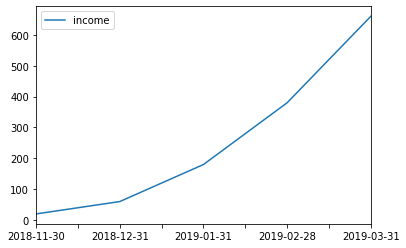

In [55]:
df['income'].plot()

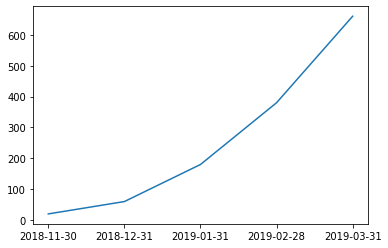

In [53]:
plt.plot(df.index, df.income)

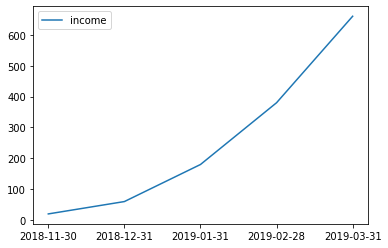

In [56]:
sns.lineplot(data=df)

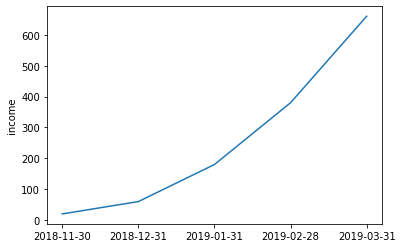

In [57]:
sns.lineplot(x=df.index, y=df.income)

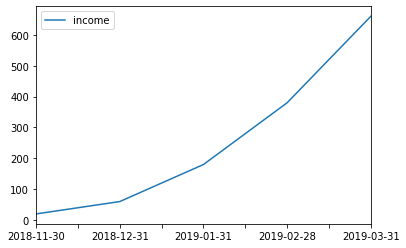

In [58]:
df.plot()

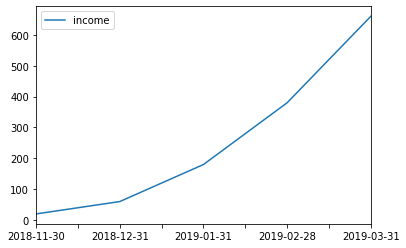

In [59]:
df.plot(kind='line')

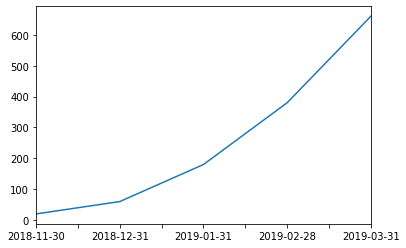

In [60]:
df.income.plot()

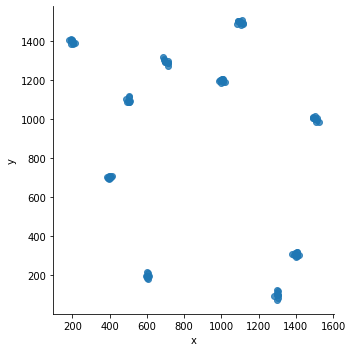

In [81]:
path = 'dataset_209770_6.txt'
df = pd.read_csv(f'/home/egor/Downloads/{path}', sep=' ')
sns.lmplot(x=df.columns[0], y=df.columns[1], data=df, fit_reg=False)

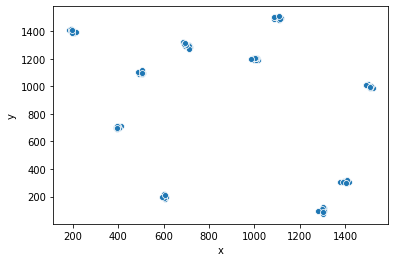

In [83]:
df = pd.read_csv(f'/home/egor/Downloads/{path}', sep=' ')
sns.scatterplot(df.iloc[:, 0], df.iloc[:, 1])

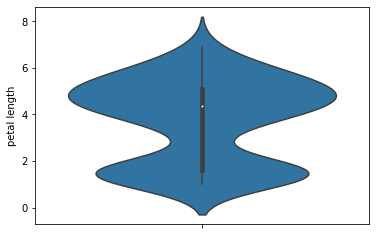

In [89]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/iris.csv', index_col=0)
sns.violinplot(y=df['petal length'])

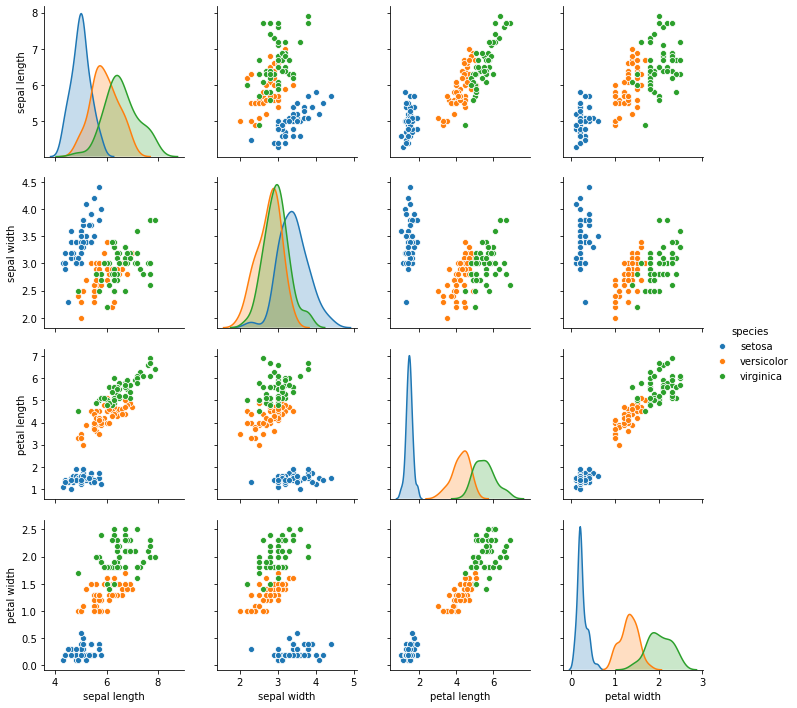

In [100]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/iris.csv', index_col=0)
df.species = df.species.astype('category')
df['species'].replace([0,1,2],['setosa', 'versicolor', 'virginica'], inplace=True)
# df['species']
g = sns.pairplot(df, hue="species")

In [105]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')
my_stat['V5'] = my_stat['V1'] + my_stat['V4']
my_stat['V6'] = np.log(my_stat['V2'])
my_stat[:5]

,V1,V2,V3,V4,V5,V6
0,2,13.0,B,1.0,3.0,2.564949
1,-1,7.0,B,1.0,0.0,1.945910
2,0,11.0,A,0.0,0.0,2.397895
3,2,11.0,A,2.0,4.0,2.397895
4,0,10.0,B,-1.0,-1.0,2.302585


In [106]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')
my_stat=my_stat.assign(V5 = my_stat.V1+my_stat.V4, V6 = np.log(my_stat.V2))
my_stat[:5]

,V1,V2,V3,V4,V5,V6
0,2,13.0,B,1.0,3.0,2.564949
1,-1,7.0,B,1.0,0.0,1.945910
2,0,11.0,A,0.0,0.0,2.397895
3,2,11.0,A,2.0,4.0,2.397895
4,0,10.0,B,-1.0,-1.0,2.302585


In [107]:
my_stat
l = np.log(my_stat['V2'])
my_stat.eval('V5 = V1 + V4', inplace = True)
my_stat.eval('V6 = @l', inplace = True)
my_stat[:5]

,V1,V2,V3,V4,V5,V6
0,2,13.0,B,1.0,3.0,2.564949
1,-1,7.0,B,1.0,0.0,1.945910
2,0,11.0,A,0.0,0.0,2.397895
3,2,11.0,A,2.0,4.0,2.397895
4,0,10.0,B,-1.0,-1.0,2.302585


In [112]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')
my_stat.rename(columns={'V1': 'session_value', 'V2': 'group', 'V3': 'time', 'V4': 'n_users'}, inplace=True)
my_stat[:5]

,session_value,group,time,n_users
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
4,0,10.0,B,-1.0


In [157]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat_1.csv')
my_stat.session_value.fillna(0, inplace=True)
ser = my_stat.n_users
median = ser[ser >= 0].median()
ser.loc[ser < 0] = median
my_stat[:10]

,session_value,time,group,n_users
0,0.0,12,B,9.0
1,0.0,11,A,5.0
2,1.0,8,A,1.0
3,2.0,9,B,3.0
4,2.0,10,B,9.0
5,3.0,8,A,8.0
6,0.0,11,B,5.0
7,0.0,9,A,4.0
8,0.0,8,B,5.0
9,0.0,9,A,5.0


In [161]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat_1.csv')
my_stat['session_value'].fillna(0, inplace=True)
my_stat.loc[my_stat['n_users']<0, 'n_users'] = my_stat[my_stat['n_users']>0]['n_users'].median()
my_stat

,session_value,time,group,n_users
0,0.0,12,B,9.0
1,0.0,11,A,5.0
2,1.0,8,A,1.0
3,2.0,9,B,3.0
4,2.0,10,B,9.0
5,3.0,8,A,8.0
6,0.0,11,B,5.0
7,0.0,9,A,4.0
8,0.0,8,B,5.0
9,0.0,9,A,5.0


In [165]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat_1.csv')
my_stat.n_users.loc[my_stat.n_users < 0] = my_stat.n_users.loc[my_stat.n_users >= 0].median()
my_stat

,session_value,time,group,n_users
0,0.0,12,B,9.0
1,NaN,11,A,5.0
2,1.0,8,A,1.0
3,2.0,9,B,3.0
4,2.0,10,B,9.0
5,3.0,8,A,8.0
6,NaN,11,B,5.0
7,0.0,9,A,4.0
8,0.0,8,B,5.0
9,0.0,9,A,5.0


In [166]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat_1.csv')
my_stat = my_stat.fillna(0)
my_stat.n_users = my_stat.n_users.where(my_stat.n_users >= 0, my_stat.n_users[my_stat.n_users >= 0].median())
my_stat

,session_value,time,group,n_users
0,0.0,12,B,9
1,0.0,11,A,5
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9
5,3.0,8,A,8
6,0.0,11,B,5
7,0.0,9,A,4
8,0.0,8,B,5
9,0.0,9,A,5


In [175]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat_1.csv')
mean_session_value_data = my_stat.groupby('group', as_index=False).agg({'session_value': 'mean'}) \
    .rename(columns={'session_value': 'mean_session_value'})
mean_session_value_data

,group,mean_session_value
0,A,1.0
1,B,1.0
